In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

In [2]:
T = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

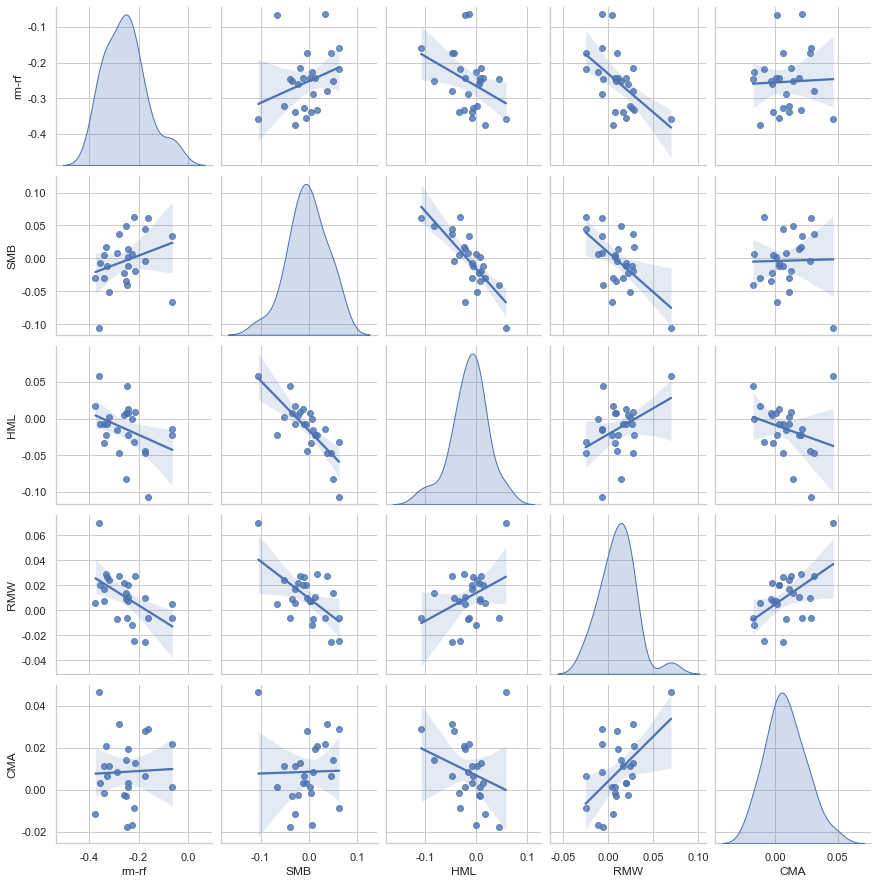

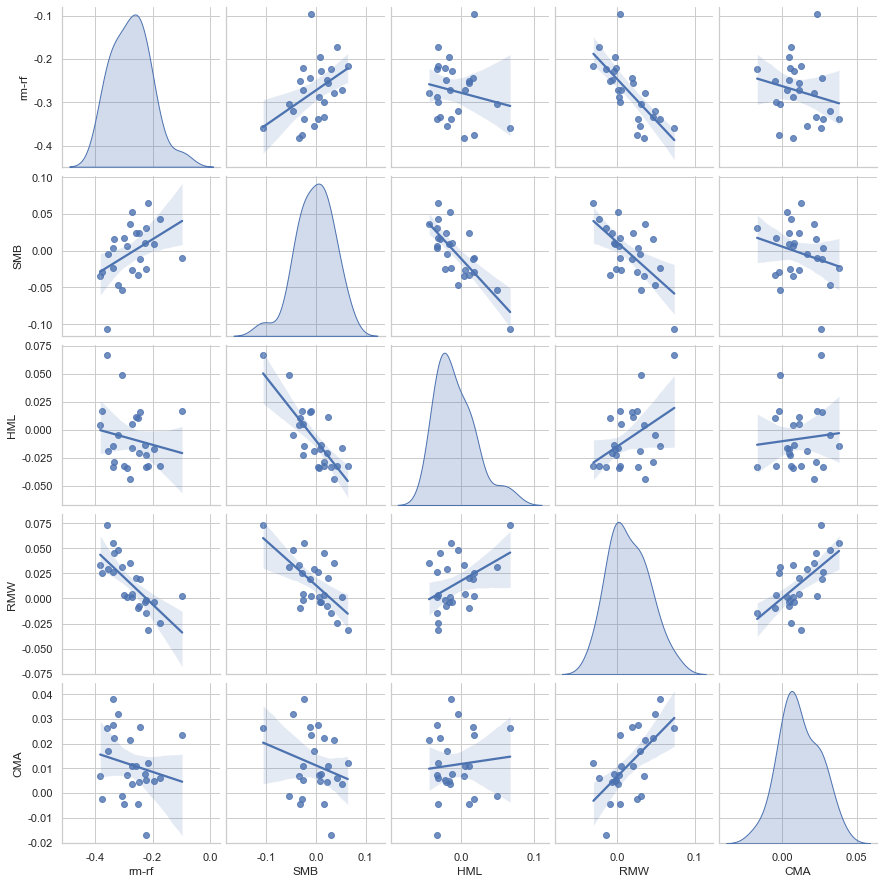

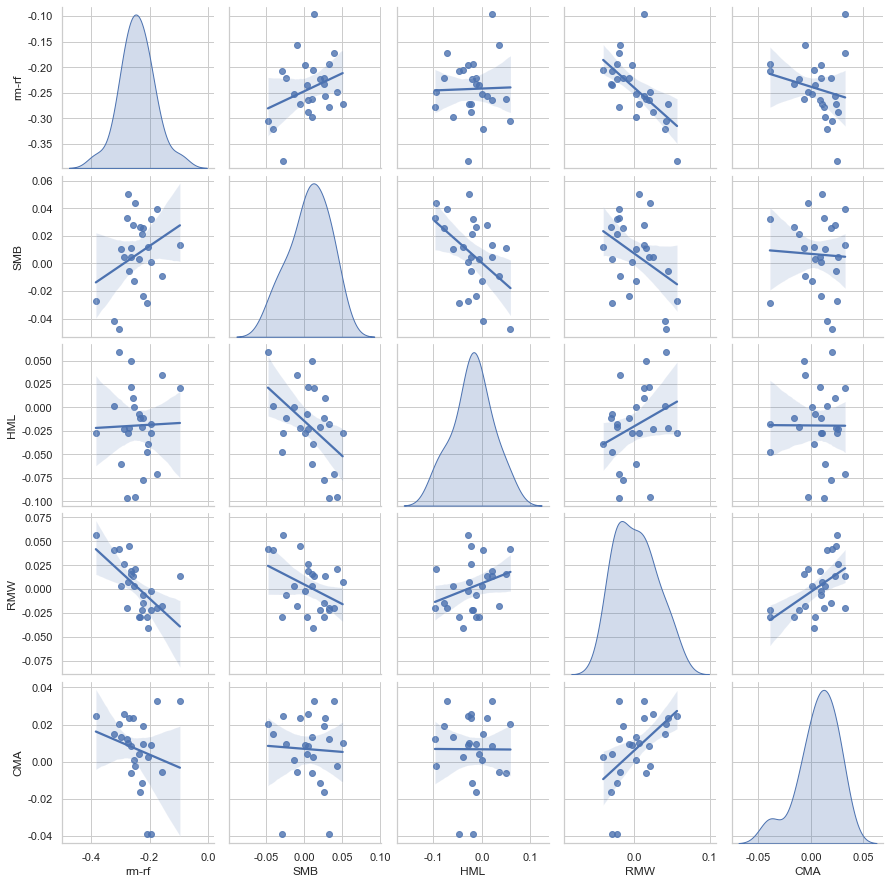

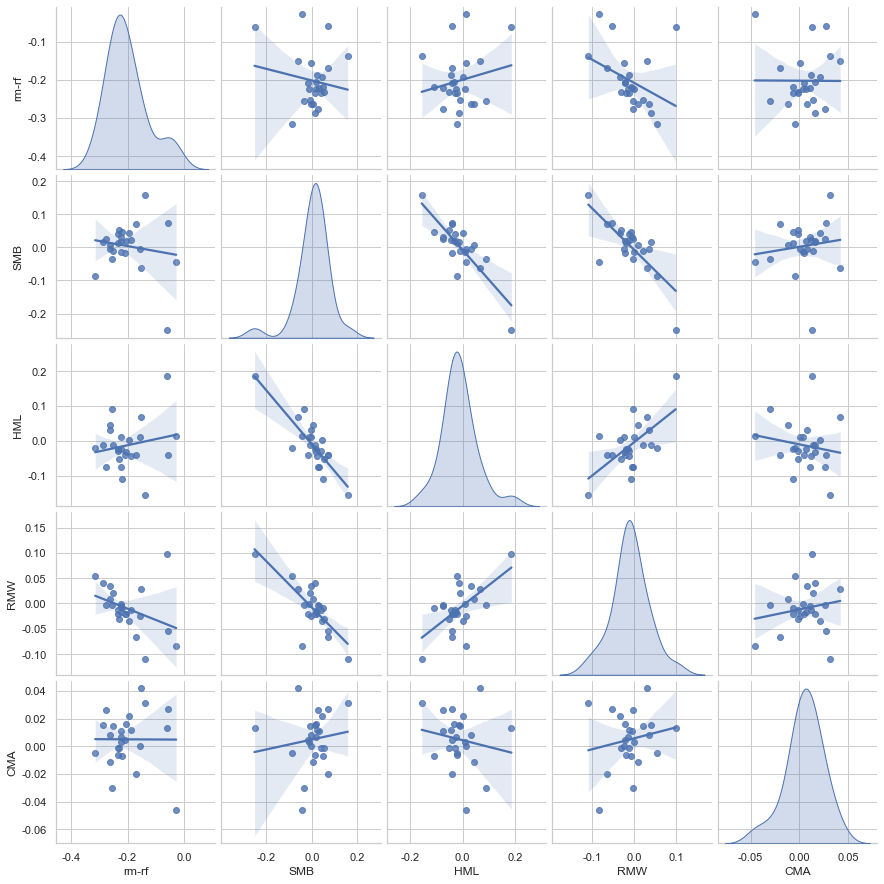

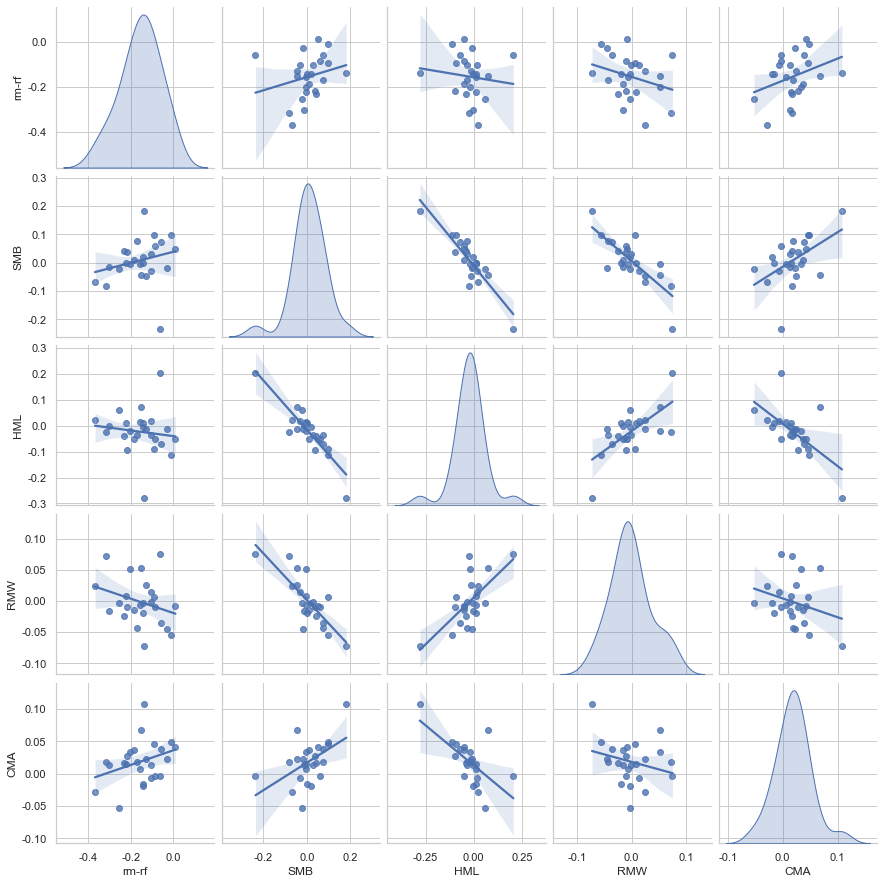

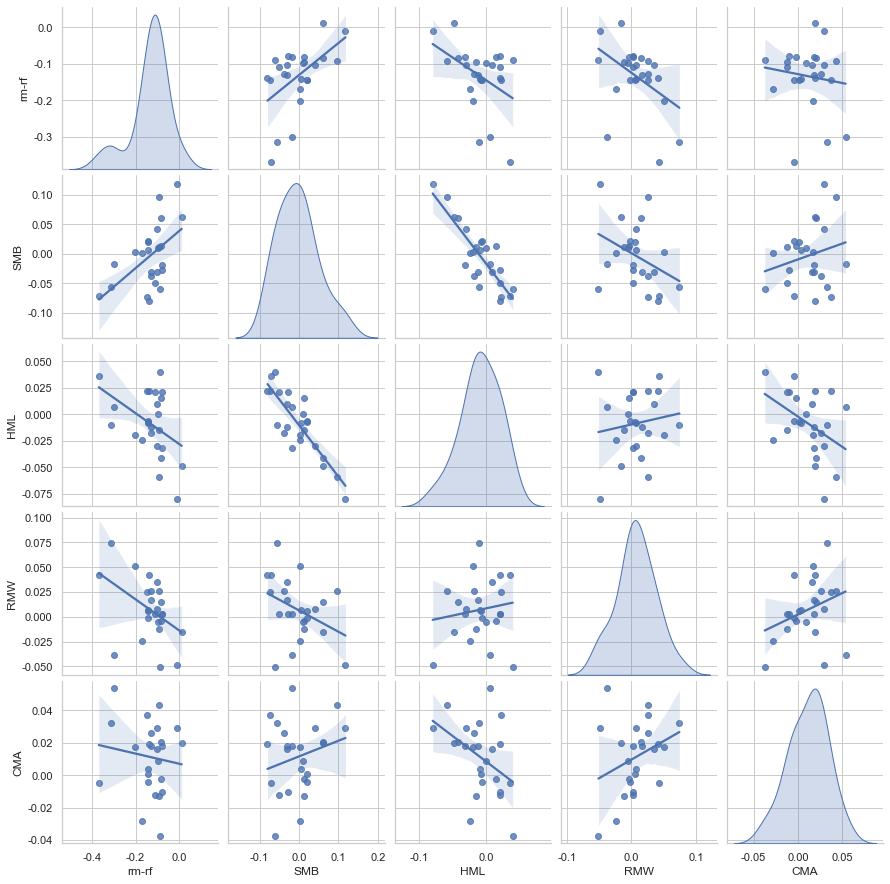

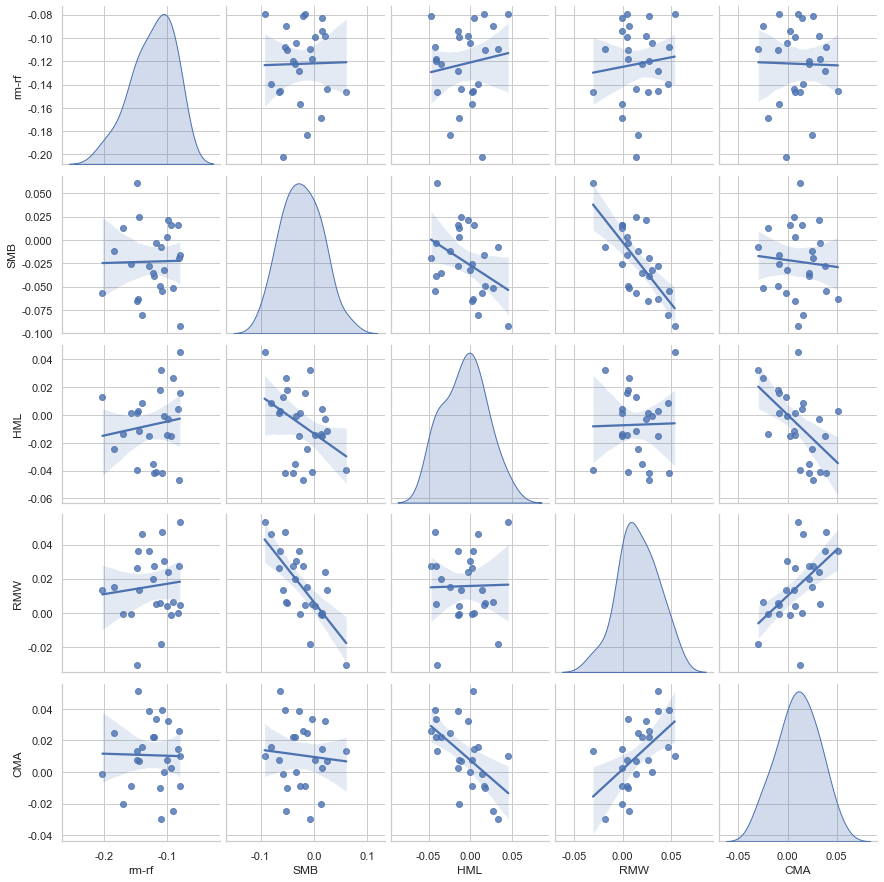

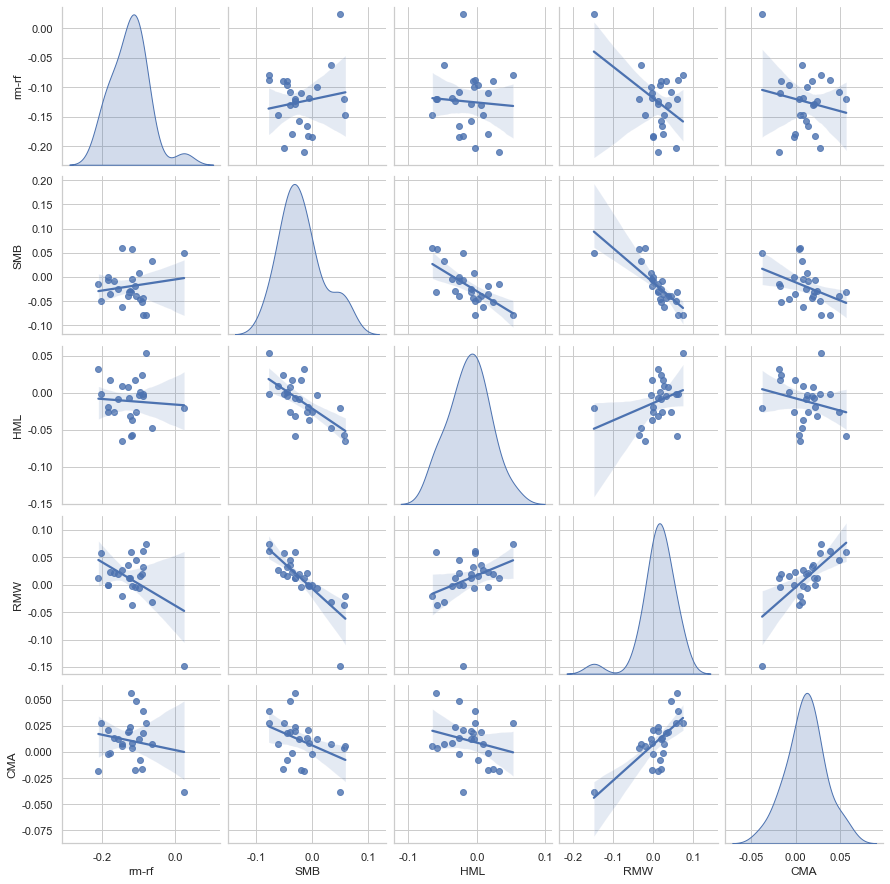

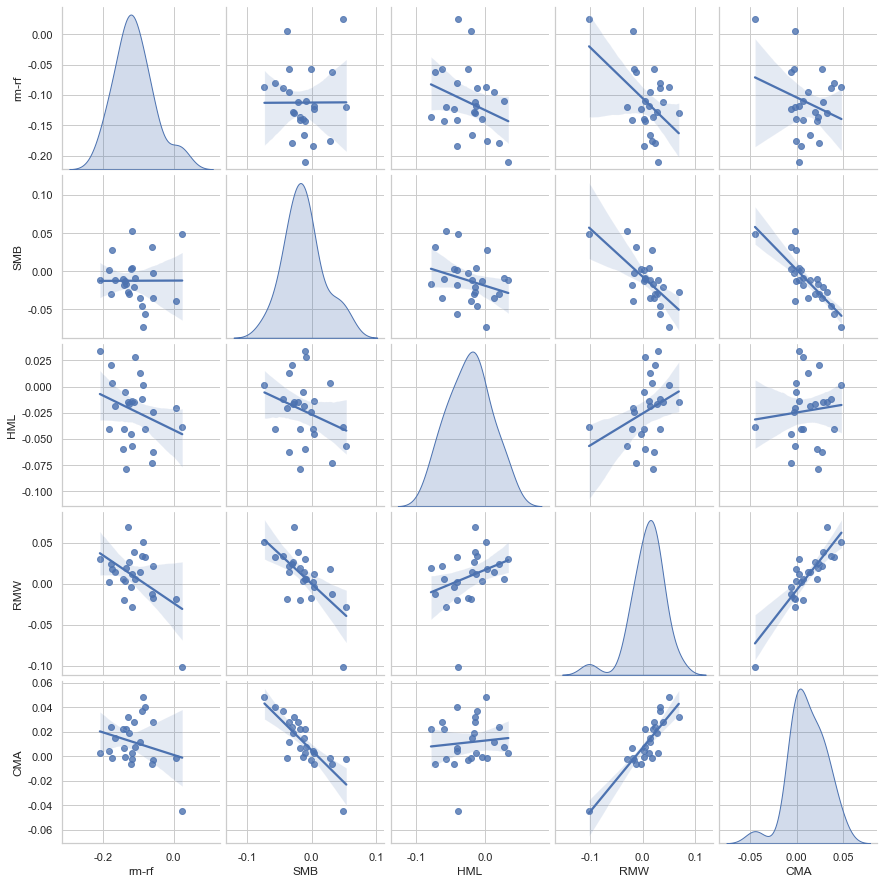

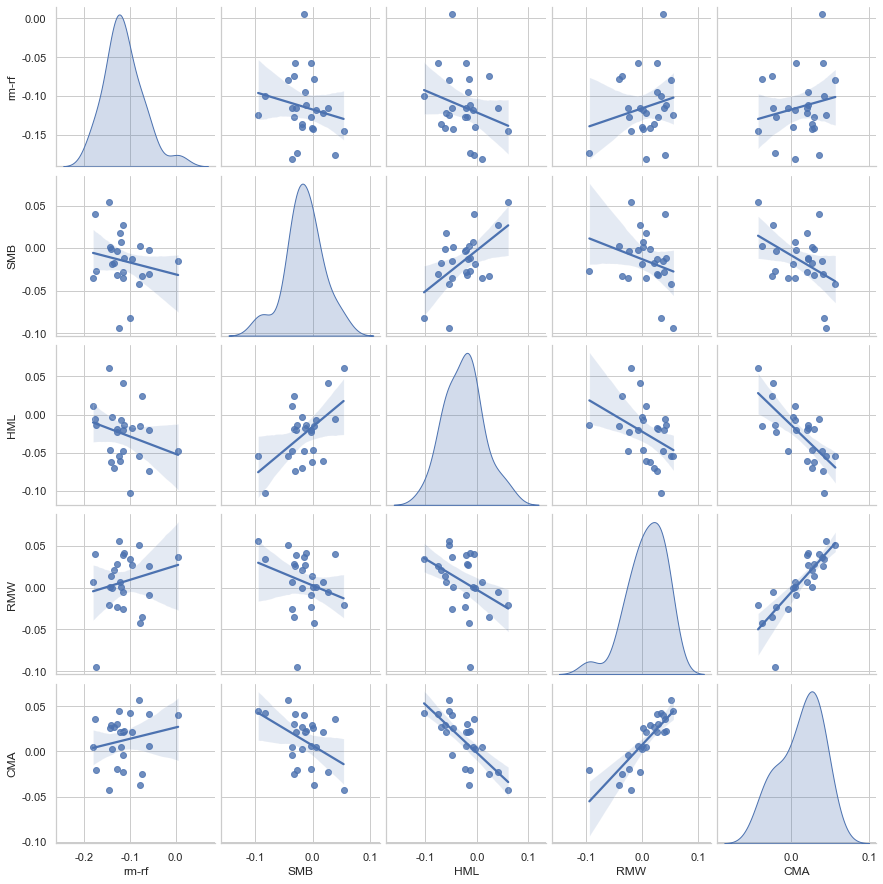

In [3]:
for t in T:
    df = pd.read_csv('../data/step3/{}.csv'.format(t))
    df = df[['rm-rf', 'SMB', 'HML', 'RMW', 'CMA']]
    sns.set(style='whitegrid', context='notebook')
    sns.pairplot(df, size=2.5, kind="reg", diag_kind="kde")
    plt.savefig('../figure/pairplot/{}.png'.format(t))
    

In [4]:
for t in T:
    df = pd.read_csv('../data/step3/{}.csv'.format(t))
    df = df[['rm-rf', 'SMB', 'HML', 'RMW', 'CMA']]
    print('\n======================第' + str(t - 2) + '年到' + str(t) + '年=======================')
    print(df.describe())
    print('\n')


======================第2010年到2012年=======================
           rm-rf        SMB        HML        RMW        CMA
count  25.000000  25.000000  25.000000  25.000000  25.000000
mean   -0.253879  -0.003407  -0.013916   0.010638   0.008490
std     0.083164   0.040174   0.035301   0.019873   0.015573
min    -0.374919  -0.104878  -0.107063  -0.025059  -0.017661
25%    -0.326836  -0.029045  -0.031879  -0.005973  -0.001740
50%    -0.250656  -0.004578  -0.007803   0.009443   0.006343
75%    -0.216967   0.017279   0.007381   0.021858   0.019456
max    -0.063217   0.062873   0.057957   0.070053   0.046456



======================第2011年到2013年=======================
           rm-rf        SMB        HML        RMW        CMA
count  25.000000  25.000000  25.000000  25.000000  25.000000
mean   -0.274803  -0.002571  -0.007833   0.014431   0.011468
std     0.068542   0.037741   0.027281   0.025901   0.013188
min    -0.382552  -0.105986  -0.044073  -0.031221  -0.016815
25%    -0.333903  -0.02659

In [5]:
tb = PrettyTable()
tb.title = 'Correlation between SMB and HML'
tb.align = 'c'
for t in T:
    df = pd.read_csv('../data/step3/{}.csv'.format(t))
    tb.field_names = ["Time Period", "Cov", "Pearson", "Spearman", "Kendall"]
    cov = round(df['SMB'].cov(df['HML']), 5)
    pearson = round(df['SMB'].corr(df['HML'], method="pearson"), 2)
    spearman = round(df['SMB'].corr(df['HML'], method="spearman"), 2)
    kendall = round(df['SMB'].corr(df['HML'], method="kendall"), 2)
    tb.add_row(['{}~{}'.format(t - 2, t), cov, pearson, spearman, kendall])
print(tb)

+-------------------------------------------------------+
|            Correlation between SMB and HML            |
+-------------+----------+---------+----------+---------+
| Time Period |   Cov    | Pearson | Spearman | Kendall |
+-------------+----------+---------+----------+---------+
|  2010~2012  | -0.0011  |  -0.77  |  -0.76   |  -0.59  |
|  2011~2013  | -0.0008  |  -0.78  |  -0.68   |  -0.49  |
|  2012~2014  | -0.00052 |  -0.48  |   -0.4   |  -0.28  |
|  2013~2015  | -0.00402 |  -0.84  |  -0.76   |  -0.58  |
|  2014~2016  | -0.00576 |  -0.89  |  -0.83   |  -0.66  |
|  2015~2017  | -0.00129 |  -0.85  |  -0.72   |  -0.55  |
|  2016~2018  | -0.00037 |   -0.4  |  -0.34   |   -0.2  |
|  2017~2019  | -0.00074 |  -0.66  |  -0.64   |  -0.48  |
|  2018~2020  | -0.00026 |  -0.29  |  -0.24   |  -0.16  |
|  2019~2021  | 0.00067  |   0.55  |   0.37   |   0.28  |
+-------------+----------+---------+----------+---------+


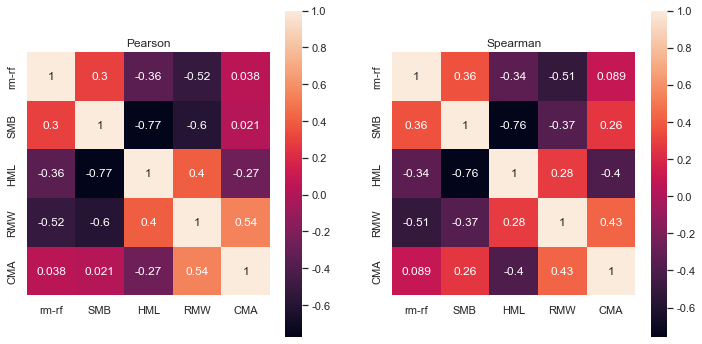

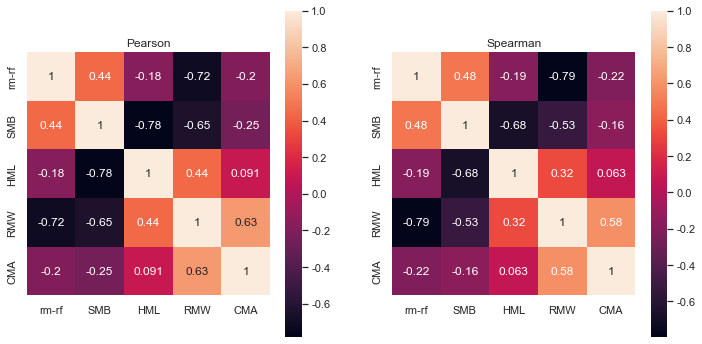

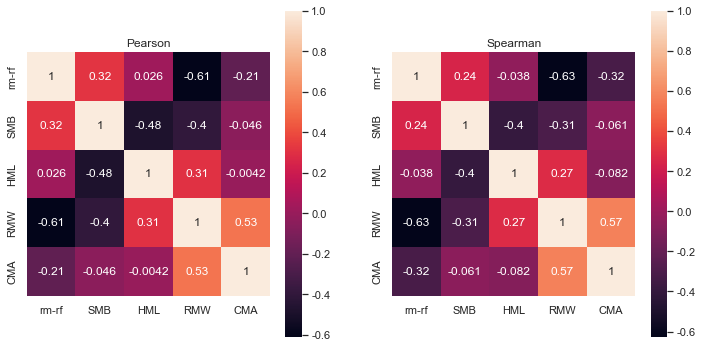

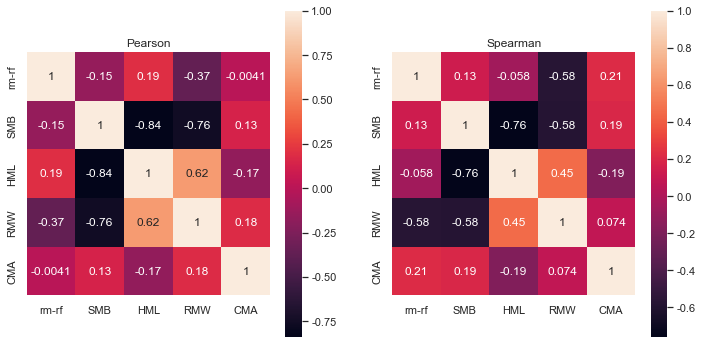

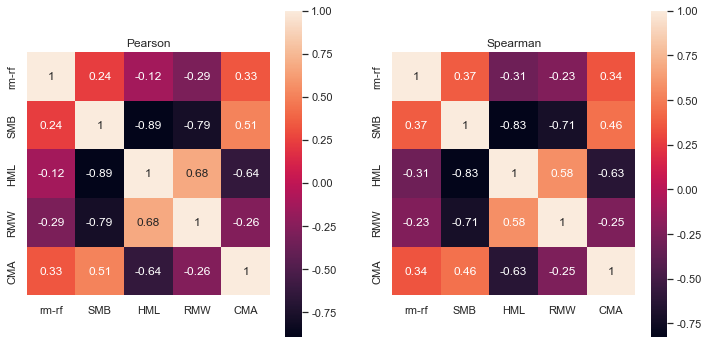

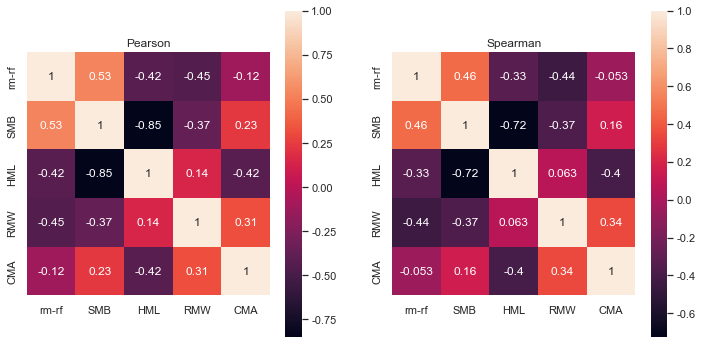

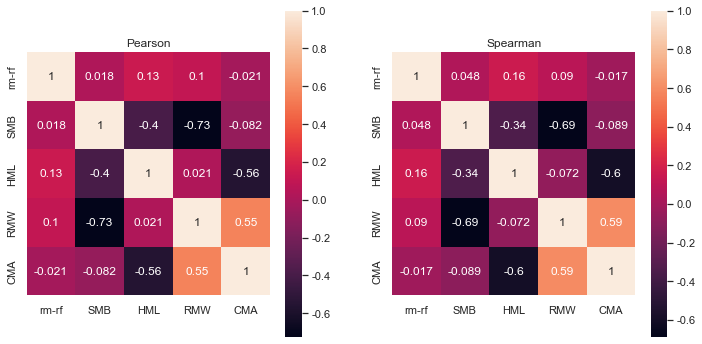

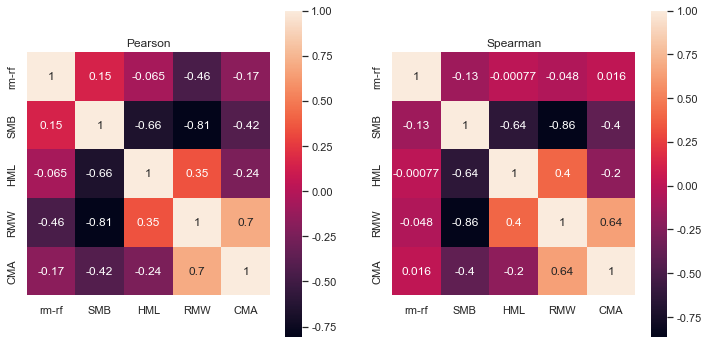

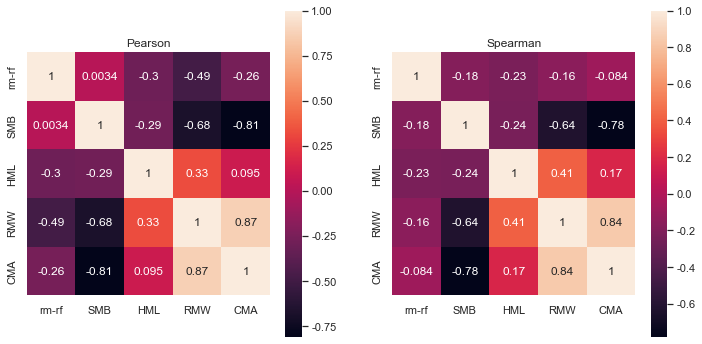

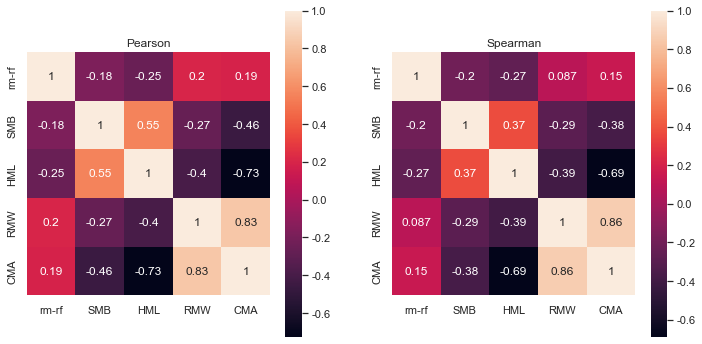

In [6]:
for t in T:
    df = pd.read_csv('../data/step3/{}.csv'.format(t))
    df = df[['rm-rf', 'SMB', 'HML', 'RMW', 'CMA']]
    figure, ax = plt.subplots(figsize=(12, 6))
    ax1 = plt.subplot(1, 2, 1)
    sns.heatmap(df.corr(method="pearson"), square=True, annot=True, ax=ax1)
    plt.title('Pearson')
    ax2 = plt.subplot(1, 2, 2)
    sns.heatmap(df.corr(method="spearman"), square=True, annot=True, ax=ax2)
    plt.title('Spearman')
    plt.savefig('../figure/heatmap/{}.png'.format(t))